# Titanic EDA Project #
## Nora Cook ##
**Please use this template and fill in your code and comments (* as frequent as applicable *) ** 

You may add more cells but *do not change the order or delete template cells*

All questions are answered before any code, but concluding remarks are listed after any coding in the plotting section.


## Step 1: Reading the data

In [388]:
import pandas as pd
import numpy as np
%matplotlib inline
titanic = pd.read_csv("train.csv") 
#save you csv file in the same folder as this jupyter notebook file
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Step 2: Cleaning the data

**1** . Create a bar chart showing how many missing values are in each column

In [389]:
performance=titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [390]:
performance=titanic.isnull().sum()
list(performance)

[0, 0, 0, 0, 0, 177, 0, 0, 0, 0, 687, 2]

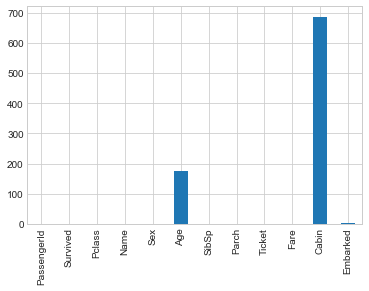

In [391]:
performance.plot(kind='bar')

**2** . Which column has the most `NaN` values?

The Cabin column has the most null values.

How many cells in that column are empty?

There are 687 empty cells in the Cabin column.

**3**. Delete all rows where `Embarked` is empty

In [392]:
titanic = titanic.dropna(axis=0, subset=['Embarked'])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


**4**. Fill all empty cabins with **¯\\_(ツ)_/¯**
 
 Note: `NaN`, empty, and missing are synonymous.

In [393]:
titanic['Cabin'].fillna(value='**Â¯\\_(ãƒ„)_/Â¯**', inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**Â¯\_(ãƒ„)_/Â¯**,S


## Step 3: Feature extraction

**1**. There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [405]:
titanic['FamilyCount']=(titanic['Parch'])+(titanic['SibSp'])
titanic['FamilyCount'].head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: FamilyCount, dtype: int64

In [395]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**Â¯\_(ãƒ„)_/Â¯**,S,0


**2**. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [396]:
titanic['IsReverend'] = titanic['Name'].apply\
    (lambda name: 1 if 'rev.' in name.lower() else 0).astype('int') 

In [406]:
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0


**3**. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`

Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column

In [398]:
titanicE = pd.get_dummies(titanic, columns=["Embarked"])
titanicE.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**Â¯\_(ãƒ„)_/Â¯**,0,0,0,0,1


Do the same thing for `Sex`

In [399]:
titanic3 = pd.get_dummies(titanic, columns=['Sex'])
titanic3.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,**Â¯\_(ãƒ„)_/Â¯**,S,0,0,0,1


BONUS: Extract the title from everyone's name and create dummy columns

## Step 4: Exploratory analysis

**1**. What was the survival rate overall?

In [400]:
titanic['Survived'].mean()

0.38245219347581555

The overall survival rate for the titanic was 38.25%. In the following exploratory analysis and graphs we will see that some factors like sex, class, age, and where one embarked played a key role in ones survival from the devasting Titanic disaster.

**2**. Which gender fared the worst? 

The male gender fared worse than the females.

What was their survival rate?

If you were a female there was an almost 75% chance of surviving at 74.04%. If you were male your liklihood of survival was 18.89%. I guess the men were very chivalrous at the time the Titanic sank.

In [ ]:
print(titanic.groupby('Sex').Survived.mean())

If you were a female there was an almost 75% chance of surviving at 74.04%. If you were male your liklihood of survival was 18.89%. I guess the men were very chivalrous at the time the Titanic sank.

**3**. What was the survival rate for each `Pclass`?

The survival rate for each class was 62.61% first class, 46.28% second class, and 24.23% for the third class

In [ ]:
FM_survival_rate = titanic.pivot_table\
    (index='Pclass', values='Survived', aggfunc=np.mean
    )
FM_survival_rate

**4**. Did any reverends survive? How many?

There were six reverends and they all died. 

In [ ]:
def bool_into_int(x):
    if x == True:
        return 1
    else:
        return 0

In [ ]:
bool_into_int(True)

In [ ]:
int_tit=titanic['IsReverend'].map(bool_into_int)

In [ ]:
int_tit.sum()

In [ ]:
mask =(titanic['Survived'] == 1) & (titanic['IsReverend'] == 1)

In [ ]:
titanic[mask].count().iloc[0]

**5**. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

The survival rate for cabins marked '**Â¯\\_(ãƒ„)_/Â¯**' was 29.99%

In [407]:
unknown_cabin_mask = (titanic['Cabin'] == '**Â¯\\_(ãƒ„)_/Â¯**')
unknowns = titanic[unknown_cabin_mask]
unknowns.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,S,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**Â¯\_(ãƒ„)_/Â¯**,S,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,**Â¯\_(ãƒ„)_/Â¯**,Q,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,**Â¯\_(ãƒ„)_/Â¯**,S,4,0


In [408]:
unknowns.shape

(687, 14)

In [409]:
survived_mask = (unknowns['Survived'] == 1)
survived_unknowns = unknowns[survived_mask]
survived_unknowns.shape

(206, 14)

In [ ]:
percent_of_unknown_cabin_survival = 206/687
percent_of_unknown_cabin_survival

**6** . What is the survival rate for people whose `Age` is empty?

52 passengers with no age survived out of 177. That is a 29.38% survival rate.

In [410]:
titanic.loc[(titanic["Survived"] == 1)\
    & (titanic["Age"].isnull())].count().iloc[0]

52

In [411]:
52/177

0.2937853107344633

**7** .What is the survival rate for each port of embarkation?

93 passengers from port Cherbourg (Embarked_C), 30 from port Queensworth (Embarked_Q) passengers, and 217 from port Southhampton (Embarked_S) passengers survived. The Survival Rates 37.65% for port C, 38.96 from port Q and 33.67% from port S.

In [ ]:
Embarked_C_amt = titanicE.pivot_table\
(index='Embarked_C', values='Survived', aggfunc=np.sum)
Embarked_C_amt

In [ ]:
Embarked_C_per = 93/(93+247)
Embarked_C_per

In [ ]:
Embarked_Q_amt = titanicE.pivot_table\
(index='Embarked_Q', values='Survived', aggfunc=np.sum)
Embarked_Q_amt

In [ ]:
Embarked_Q_per = 30/(310+30)
Embarked_Q_per

In [ ]:
Embarked_S_amt = titanicE.pivot_table\
(index='Embarked_S', values='Survived', aggfunc=np.sum)
Embarked_S_amt

In [ ]:
Embarked_S_per = 217/(123+217)
Embarked_S_per

**8** .What is the survival rate for children (under 12) in each `Pclass`?

The survival rates for children under 12 and under per class is 
57.97%. Children in the second class had a 100% survival rate followed by the first class at 75% and sadly only 41.67% of the children in the third class lived

In [ ]:
titanic_filtered = titanic.loc[(titanic["Survived"] == 1)
& (titanic["Age"] <=12)]
titanic_filtered

In [ ]:
titanic_youth_survived = titanic_filtered['Pclass'].value_counts()
titanic_youth_survived

In [ ]:
titanic_youth = titanic.loc[titanic["Age"] <= 12]
titanic_youth.head()

In [ ]:
total_youth_perclass = titanic_youth['Pclass'].value_counts()
total_youth_perclass

In [ ]:
titanic_youth_survived/total_youth_perclass

In [ ]:
total_survived_youth = titanic_filtered['Pclass'].value_counts().sum()
total_survived_youth

In [ ]:
total_youth = titanic_youth['Pclass'].value_counts().sum()
total_youth

In [ ]:
total_survived_youth/total_youth

**9** . Did the captain of the ship survive? Is he on the list?


One captain was in this dataset his name was Edward Gifford Crosby and he died. I looked it up on google. He was not the captain of the Titanic. The captain of the Titanic's name was Captain Edwar John Smith.

In [ ]:
mask = titanic['Name'].str.contains('Capt')

In [ ]:
titanic[mask]

Links to Captain Info:
http://www.titanic-titanic.com/edward_gifford_crosby.shtml
https://www.google.com/search?q=captain+of+the+titanic&rlz=1C5CHFA_enUS776US776&oq=captain+of+the+titanic&aqs=chrome.0.0l6.3486j0j4&sourceid=chrome&ie=UTF-8

**10** . Of all the people that died, who had the most expensive ticket? How much did it cost?

Miss. Anna Ward died and spent the most for her ticket at 512.33. (I am unsure of the denomination)

In [ ]:
mask = titanic['Survived'] == 0 

In [ ]:
died = titanic[mask]
died.head()


In [ ]:
Fare = titanic['Fare']

In [ ]:
titanic['Fare'].max()

In [ ]:
titanic['Fare'].argmax()

In [ ]:
titanic.loc[titanic['Fare'] == 512.32920000000001]

**11**. Does having family on the boat help or hurt your chances of survival?

Having one to three family members helped ones survival rate were having three family members one had the maximum advantage. Having now family members or more then three family members was a disadvantage and one's survival rate is lowered significantly.

In [ ]:
FM_survival_rate = titanic.pivot_table\
(index='FamilyCount', values='Survived', aggfunc=np.mean)
FM_survival_rate

## Step 5: Plotting

Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

A family of three had the best chance of survival. For instance a mother father pair with one child.

In [ ]:
FM_survival_rate.plot(kind='bar')

In [ ]:
sns.set_style("whitegrid")
sns.violinplot(x='Survived', y='Age', hue='Sex', data=titanic,\
    scale='count', palette='muted'
    )
plt.title('Survival Rates by Age and Sex')

Here we see what ages and sexes survived and died. 0 stands for died and 1 stands for survived. What we notice is that very old men had a good chance of surviving and that there were more old men then older women, which is surprising because women supposedly live longer. 

In the following graph we can see that single females the most likely to survive.

In [ ]:
sns.set_style("whitegrid")
sns.violinplot(x='Survived', y='FamilyCount', hue='Sex', data=titanic, scale='count', palette='muted')
plt.title('Survival Rates by Age and Sex')
plt.legend(loc='upper right')

The fare for the ride has a right skew. The mode or the most purchased fare for a ticket was 43. (I am unsure of the denomination.) Most tickets were bought for under a hundred. There were a few outliers were people bought tickets for over 500. Some people got on the boat free of charge.

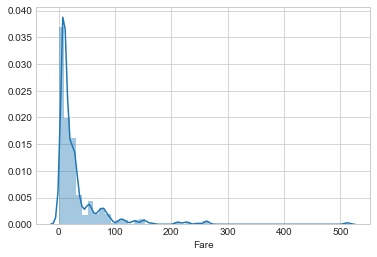

In [413]:
sns.distplot(titanic['Fare'])


In [414]:
titanic['Fare'].value_counts().max()

43

In [415]:
titanic['Fare'].min()

0.0

In [ ]:
titanic.head()

Here we see what classes and what sexes survived. Females of the first class having the best chances.

Text(0.5,1,'Survivors Class and Sex')

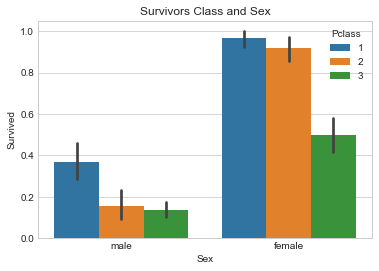

In [403]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic);
plt.title('Survivors Class and Sex')

Text(0.5,1,'Survivors Depending on where they embarked and their class')

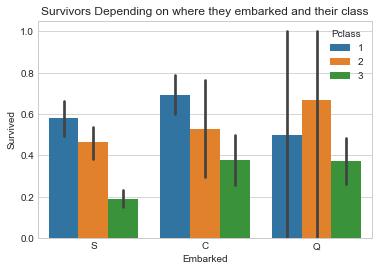

In [404]:
sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=titanic);
plt.title('Survivors Depending on Where They Embarked and Their Class')

Here we see that the most first class tickets came from Cherbourg, which also had the highest survival rate

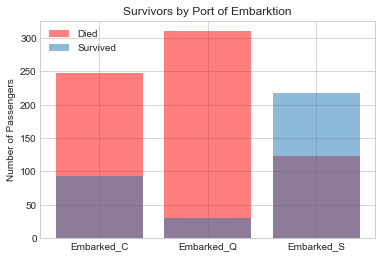

In [381]:
y1 = [247,310,123]
y2 = [93,30,217]
x = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

plt.bar(x, y1, color='red', alpha=.5)
plt.bar(x, y2, alpha=.5)
plt.title('Survivors by Port of Embarktion')
plt.ylabel('Number of Passengers')
plt.legend(('Died', 'Survived'), loc=2)

Passengers departing from the port of Southampton had the highest rate of survival.

Conclusion:
From the following observations I believe that someone with the best chance of survival would be a single female in their early 20s', who embaked from Southhampton or Cherbourg, and was in the first class, although 100% of the children 12 and younger from the second class survived. Very old men also had a high rate of survival. These two observation had less statistial significance because the sample was too small.